In [56]:
"""DSDM2.ipynb


Name: Khushbu Patel (kp22472)
Reg. No.:
Supervisor: Dr Ana Matran-Fernandez
"""

import pandas as pn
import numpy as np
import matplotlib.pyplot as pyplot
import os
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer,IterativeImputer,SimpleImputer
import seaborn as sn

In [57]:

# the process of loading the .tsv file for a particular participant from the collection of 60 files in the dataset to carry out our tasks.
# Certain files are quite large and are leading to memory-related problems. To alleviate the strain on the machine, we can opt to load a small percentage of the data from those files.

# num_rows = int(len(pn.read_csv('Participant0010.tsv', sep='\t')) * 0.1)
# df = pn.read_csv('Participant0010.tsv', sep='\t', nrows=num_rows)

df = pn.read_csv('Participant0001.tsv', sep='\t')

<ipython-input-57-fa920a7d0903>:7: DtypeWarning: Columns (37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pn.read_csv('Participant0001.tsv', sep='\t')


In [58]:
"""** Reading Data**"""

df.shape
df.head(10)
df.tail(10)

,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,...,Client area position X (DACSpx),Client area position Y (DACSpx),Viewport position X,Viewport position Y,Viewport width,Viewport height,Full page width,Full page height,Mouse position X,Mouse position Y
17488,54873989,645456010,Eye Tracker,Test group experiment,24.09.2020,Participant0001,Recording2,24.09.2020,24.09.2020,15:19:16.357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17489,54882321,645464342,Eye Tracker,Test group experiment,24.09.2020,Participant0001,Recording2,24.09.2020,24.09.2020,15:19:16.357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17490,54890649,645472670,Eye Tracker,Test group experiment,24.09.2020,Participant0001,Recording2,24.09.2020,24.09.2020,15:19:16.357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17491,54898997,645481018,Eye Tracker,Test group experiment,24.09.2020,Participant0001,Recording2,24.09.2020,24.09.2020,15:19:16.357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17492,54907313,645489334,Eye Tracker,Test group experiment,24.09.2020,Participant0001,Recording2,24.09.2020,24.09.2020,15:19:16.357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17493,54915644,645497665,Eye Tracker,Test group experiment,24.09.2020,Participant0001,Recording2,24.09.2020,24.09.2020,15:19:16.357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17494,54924059,645506080,Eye Tracker,Test group experiment,24.09.2020,Participant0001,Recording2,24.09.2020,24.09.2020,15:19:16.357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17495,54932365,645514386,Eye Tracker,Test group experiment,24.09.2020,Participant0001,Recording2,24.09.2020,24.09.2020,15:19:16.357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17496,54940695,645522716,Eye Tracker,Test group experiment,24.09.2020,Participant0001,Recording2,24.09.2020,24.09.2020,15:19:16.357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17497,54948977,645530998,Eye Tracker,Test group experiment,24.09.2020,Participant0001,Recording2,24.09.2020,24.09.2020,15:19:16.357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# Examine an overview of statistical information for the dataset.
df.describe()

,Recording timestamp,Computer timestamp,Recording duration,Recording resolution height,Recording resolution width,Average calibration accuracy (mm),Average calibration precision SD (mm),Average calibration precision RMS (mm),Average calibration accuracy (degrees),Average calibration precision SD (degrees),...,Client area position X (DACSpx),Client area position Y (DACSpx),Viewport position X,Viewport position Y,Viewport width,Viewport height,Full page width,Full page height,Mouse position X,Mouse position Y
count,1.749800e+04,1.749800e+04,17498.000000,17498.0,17498.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,888.000000,888.000000
mean,3.557699e+07,5.647213e+08,79735.168076,1080.0,1920.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-603.404279,545.135135
std,2.292606e+07,4.762717e+07,4736.104647,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.564316,311.582479
min,0.000000e+00,4.886731e+08,73900.000000,1080.0,1920.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1033.000000,-9.000000
25%,1.586028e+07,5.223838e+08,73900.000000,1080.0,1920.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-795.000000,239.500000
50%,3.360464e+07,5.588328e+08,83579.000000,1080.0,1920.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-709.000000,606.000000
75%,5.183014e+07,6.090818e+08,83579.000000,1080.0,1920.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-447.750000,825.250000
max,8.357918e+07,6.455310e+08,83579.000000,1080.0,1920.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164.000000,1065.000000


In [60]:
df.columns


Index(['Recording timestamp', 'Computer timestamp', 'Sensor', 'Project name',
       'Export date', 'Participant name', 'Recording name', 'Recording date',
       'Recording date UTC', 'Recording start time',
       'Recording start time UTC', 'Recording duration', 'Timeline name',
       'Recording Fixation filter name', 'Recording software version',
       'Recording resolution height', 'Recording resolution width',
       'Recording monitor latency', 'Average calibration accuracy (mm)',
       'Average calibration precision SD (mm)',
       'Average calibration precision RMS (mm)',
       'Average calibration accuracy (degrees)',
       'Average calibration precision SD (degrees)',
       'Average calibration precision RMS (degrees)',
       'Average calibration accuracy (pixels)',
       'Average calibration precision SD (pixels)',
       'Average calibration precision RMS (pixels)',
       'Average validation accuracy (mm)',
       'Average validation precision SD (mm)',
       'A

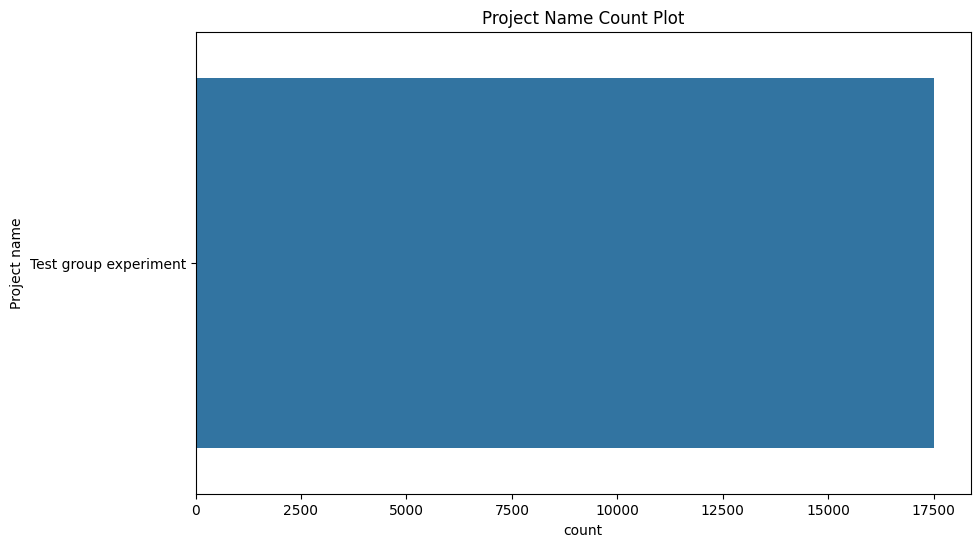

In [61]:
# bar plot for project name
pyplot.figure(figsize=(10,6))
sn.countplot(y='Project name', data=df)
pyplot.title('Project Name Count Plot')
pyplot.show()

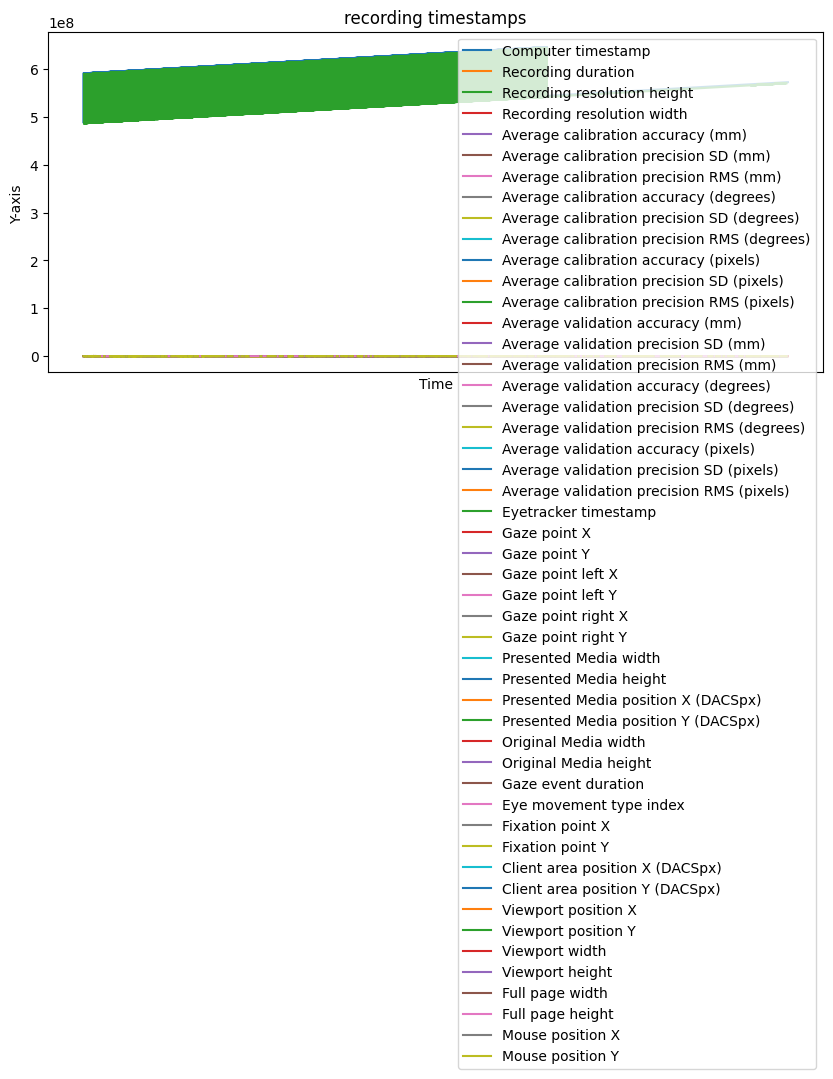

In [62]:
# convert the 'Recording timestamp' column to datetime
df['Recording timestamp'] = pn.to_datetime(df['Recording timestamp'])

# set the 'Recording timestamp' column as the index of the DataFrame
df.set_index('Recording timestamp', inplace=True)

# plot the time series
df.plot(figsize=(10, 5))

# add labels and title to the plot
pyplot.xlabel('Time')
pyplot.ylabel('Y-axis ')
pyplot.title('recording timestamps')

# show the plot
pyplot.show()

<Axes: >

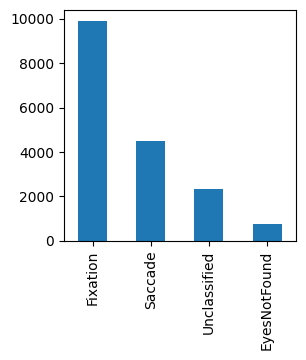

In [63]:
# Bar chart depicting eye movement categories.
df['Eye movement type'].value_counts().plot.bar(figsize=(3,3))


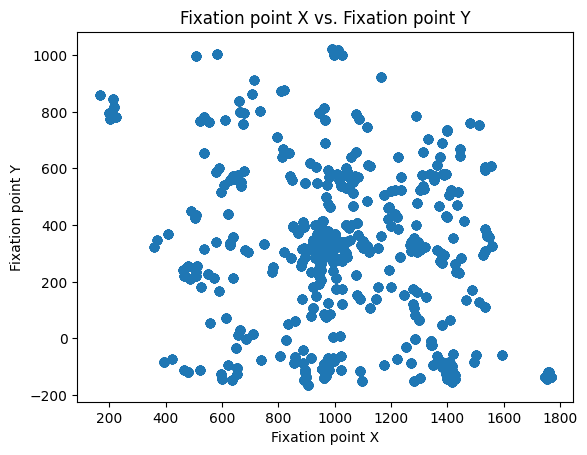

In [64]:
# Generate a scatter plot illustrating the relationship between Fixation Point X and Fixation Point Y.
pyplot.scatter(df['Fixation point X'], df['Fixation point Y'])

# Assign plot title and axis captions.
pyplot.title('Fixation point X vs. Fixation point Y')
pyplot.xlabel('Fixation point X')
pyplot.ylabel('Fixation point Y')

# Present the plot.
pyplot.show()

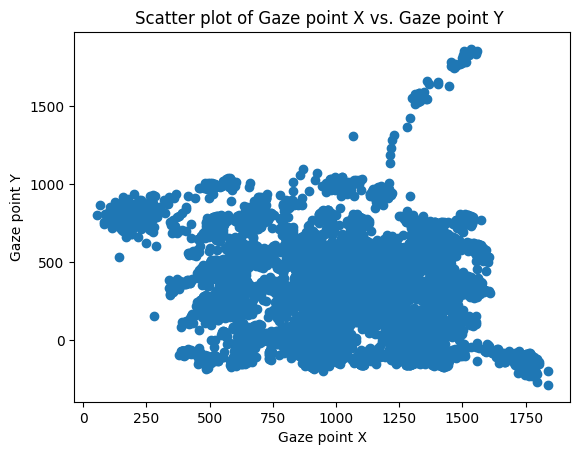

In [65]:
# Generate a scatter plot illustrating the correlation between Gaze Point X and Gaze Point Y.
pyplot.scatter(df['Gaze point X'], df['Gaze point Y'])
pyplot.xlabel('Gaze point X')
pyplot.ylabel('Gaze point Y')
pyplot.title('Scatter plot of Gaze point X vs. Gaze point Y ')
pyplot.show()

Data Cleaning

In [66]:
df.columns


Index(['Computer timestamp', 'Sensor', 'Project name', 'Export date',
       'Participant name', 'Recording name', 'Recording date',
       'Recording date UTC', 'Recording start time',
       'Recording start time UTC', 'Recording duration', 'Timeline name',
       'Recording Fixation filter name', 'Recording software version',
       'Recording resolution height', 'Recording resolution width',
       'Recording monitor latency', 'Average calibration accuracy (mm)',
       'Average calibration precision SD (mm)',
       'Average calibration precision RMS (mm)',
       'Average calibration accuracy (degrees)',
       'Average calibration precision SD (degrees)',
       'Average calibration precision RMS (degrees)',
       'Average calibration accuracy (pixels)',
       'Average calibration precision SD (pixels)',
       'Average calibration precision RMS (pixels)',
       'Average validation accuracy (mm)',
       'Average validation precision SD (mm)',
       'Average validation preci

In [25]:
# Identify columns containing over 50% missing values.
null_percent = df.isnull().sum()/len(df) * 100
# Columns for removal.
cols_to_drop = null_percent[null_percent >= 50].index

print("Columns to drop are:")
print(cols_to_drop)

Columns to drop are:
Index(['Average calibration accuracy (mm)',
       'Average calibration precision SD (mm)',
       'Average calibration precision RMS (mm)',
       'Average calibration accuracy (degrees)',
       'Average calibration precision SD (degrees)',
       'Average calibration precision RMS (degrees)',
       'Average calibration accuracy (pixels)',
       'Average calibration precision SD (pixels)',
       'Average calibration precision RMS (pixels)',
       'Average validation accuracy (mm)',
       'Average validation precision SD (mm)',
       'Average validation precision RMS (mm)',
       'Average validation accuracy (degrees)',
       'Average validation precision SD (degrees)',
       'Average validation precision RMS (degrees)',
       'Average validation accuracy (pixels)',
       'Average validation precision SD (pixels)',
       'Average validation precision RMS (pixels)', 'Event', 'Event value',
       'Pupil diameter left', 'Pupil diameter right',
       'Cl

In [26]:
#  Eliminate/discard the columns.
df.drop(cols_to_drop, axis=1, inplace=True)


In [27]:
# Remove columns with a consistent single value across the dataset.
# Iterate through the columns to identify those with a uniform single value.
for col in df.columns:
    if len(df[col].unique()) == 1:
      # drop that column
        df.drop(col,inplace=True,axis=1)

# Let's observe the count of null values present.
df.isna().sum()

Computer timestamp                        0
Sensor                                    8
Eyetracker timestamp                    169
Gaze point X                            230
Gaze point Y                            230
Gaze point left X                       394
Gaze point left Y                       394
Gaze point right X                      576
Gaze point right Y                      576
Gaze direction left X                   394
Gaze direction left Y                   394
Gaze direction left Z                   394
Gaze direction right X                  576
Gaze direction right Y                  576
Gaze direction right Z                  576
Validity left                           169
Validity right                          169
Eye position left X (DACSmm)            394
Eye position left Y (DACSmm)            394
Eye position left Z (DACSmm)            394
Eye position right X (DACSmm)           576
Eye position right Y (DACSmm)           576
Eye position right Z (DACSmm)   

array([[<Axes: title={'center': 'Computer timestamp'}>,
        <Axes: title={'center': 'Eyetracker timestamp'}>,
        <Axes: title={'center': 'Gaze point X'}>,
        <Axes: title={'center': 'Gaze point Y'}>],
       [<Axes: title={'center': 'Gaze point left X'}>,
        <Axes: title={'center': 'Gaze point left Y'}>,
        <Axes: title={'center': 'Gaze point right X'}>,
        <Axes: title={'center': 'Gaze point right Y'}>],
       [<Axes: title={'center': 'Presented Media width'}>,
        <Axes: title={'center': 'Presented Media height'}>,
        <Axes: title={'center': 'Presented Media position X (DACSpx)'}>,
        <Axes: title={'center': 'Presented Media position Y (DACSpx)'}>],
       [<Axes: title={'center': 'Original Media width'}>,
        <Axes: title={'center': 'Original Media height'}>,
        <Axes: title={'center': 'Gaze event duration'}>,
        <Axes: title={'center': 'Eye movement type index'}>],
       [<Axes: title={'center': 'Fixation point X'}>,
      

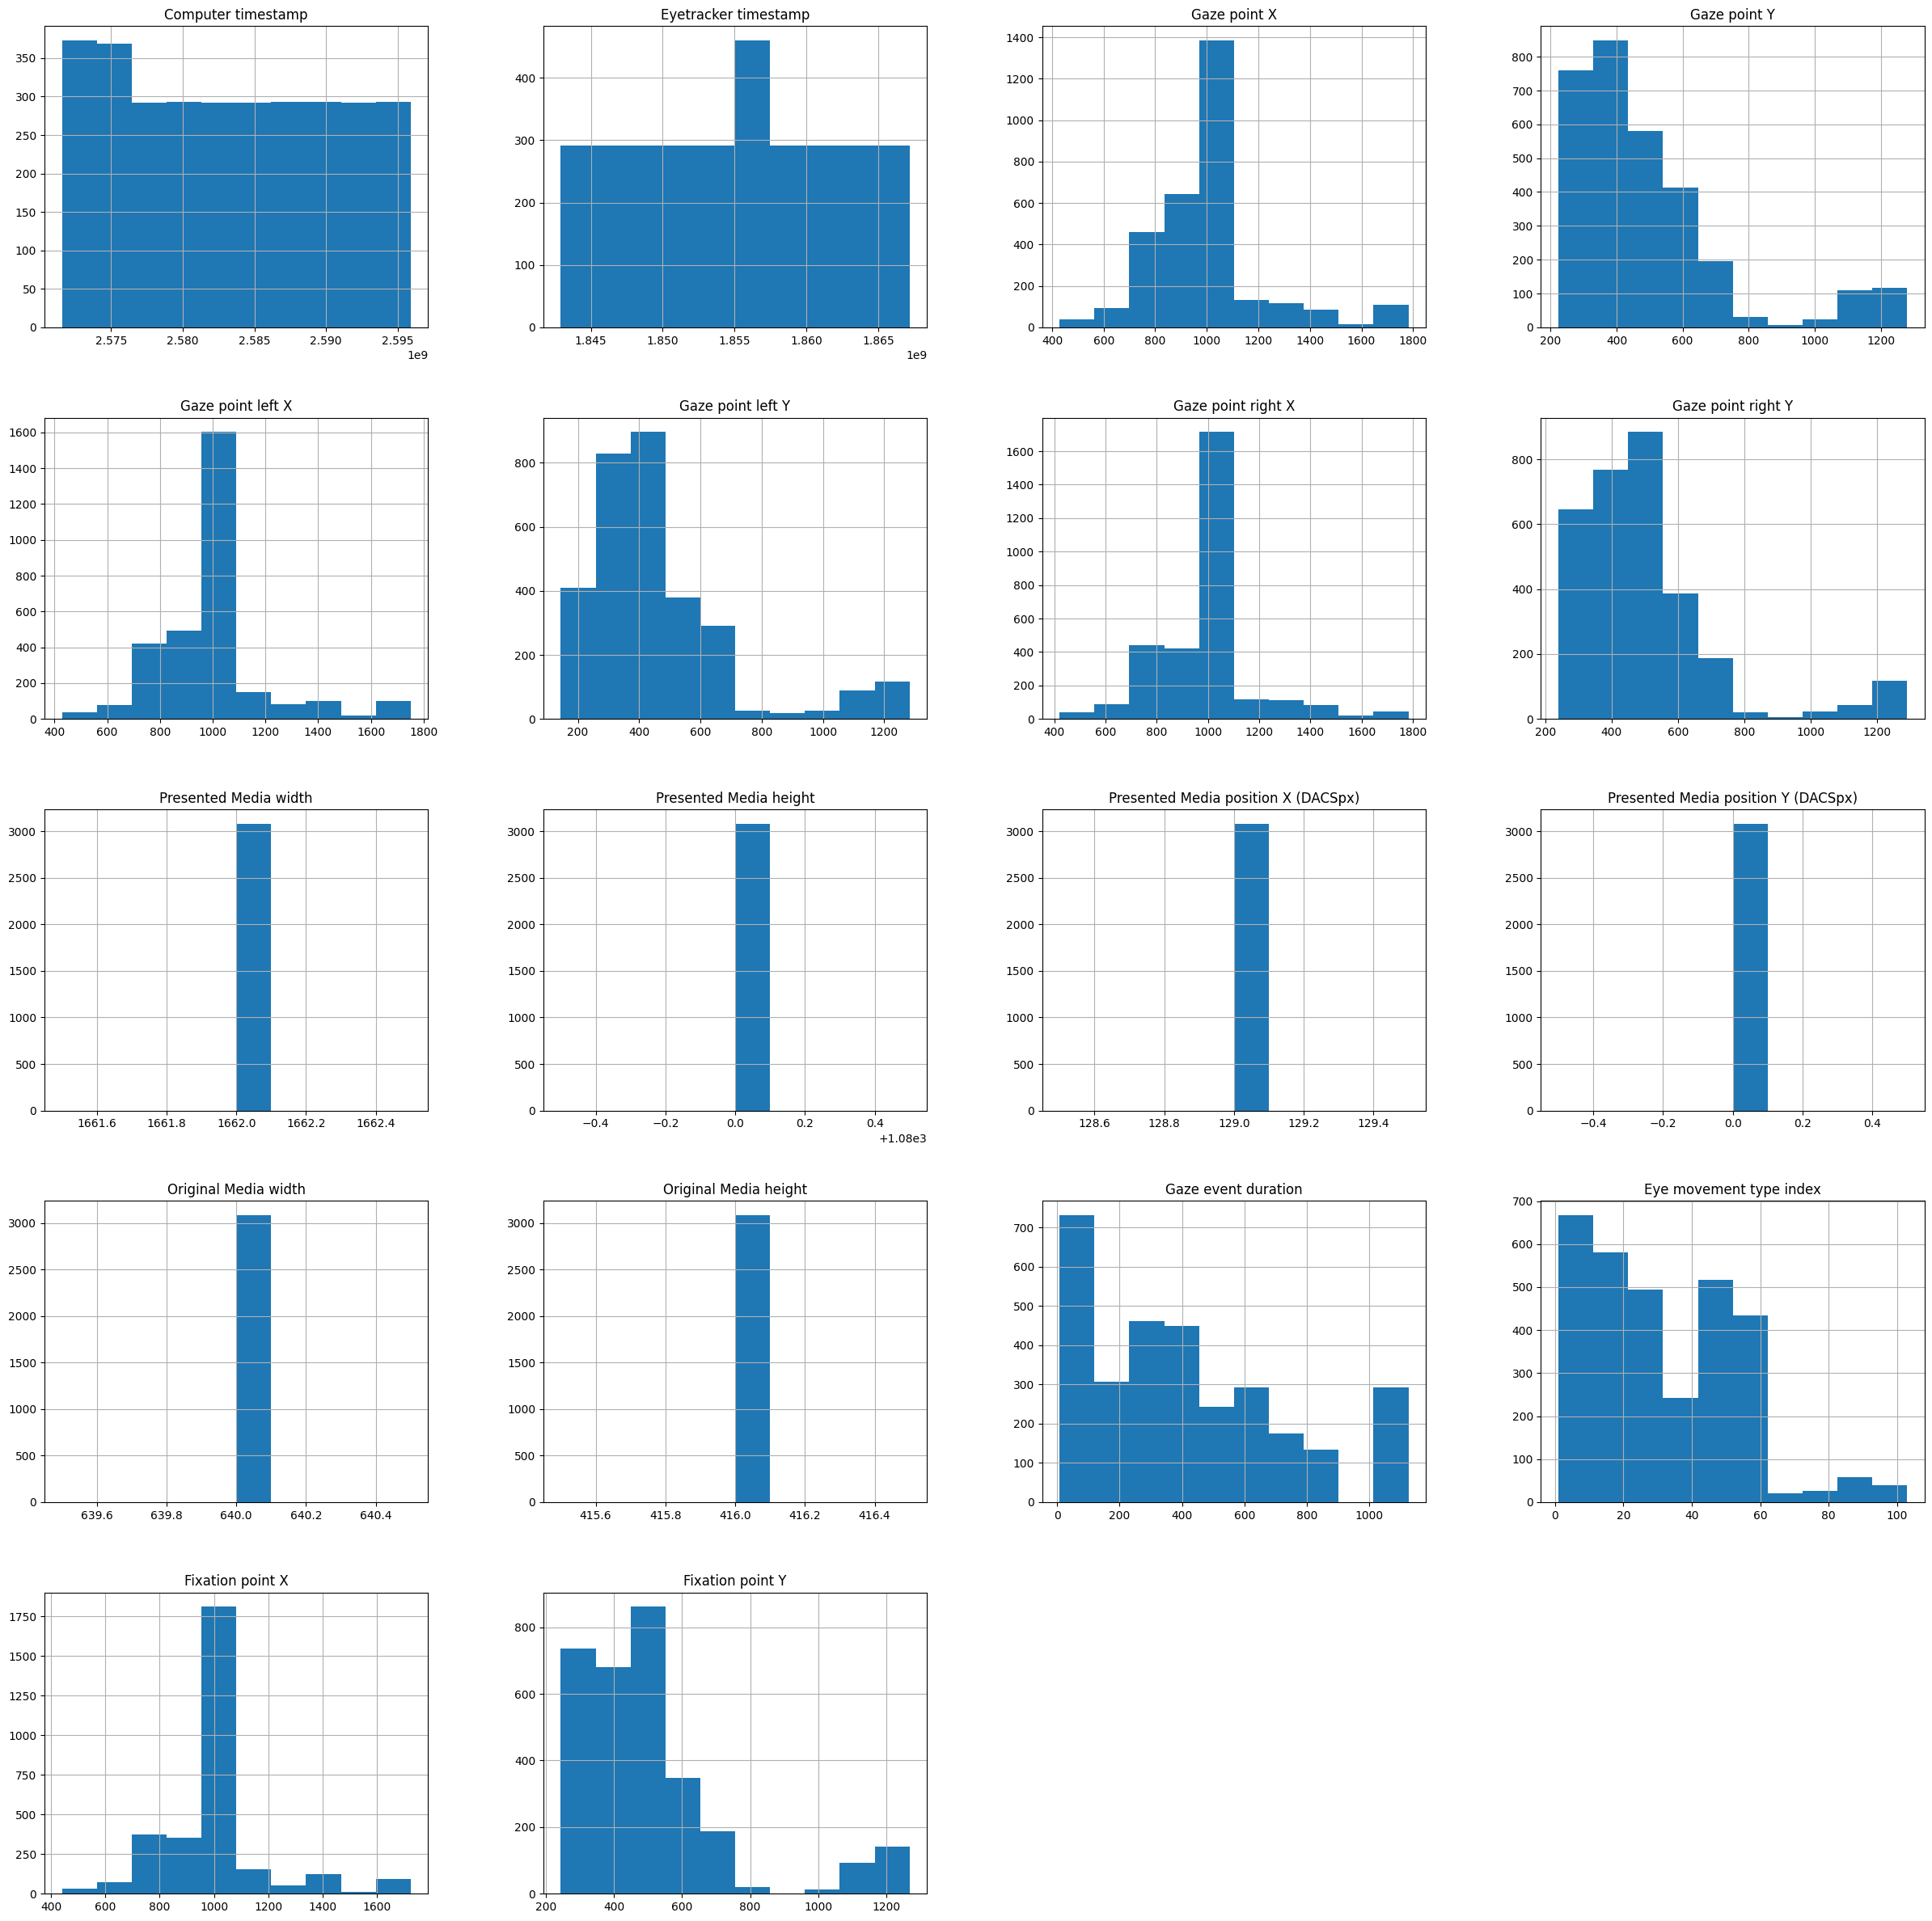

In [28]:
# Addressing missing values. We are dealing with both numerical and categorical data; discarding null values would lead to data reduction, however...
# Based on specific columns, I have opted to retain them. Instead of discarding categorical null values, I will replace them with the term "unknown."

# Impute the missing values in categorical data columns with the label "unknown."
object_cols = df.select_dtypes(include=['object']).columns
df[object_cols] = df[object_cols].fillna(df[object_cols].mode().iloc[0])

# Extract solely the numerical columns from the dataframe
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Replace the absent values with the mean of their corresponding numeric columns.
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Verifying/null value inspection at the moment
df.isna().sum()

df.hist(figsize=(30,30))

In [29]:
"""**Correlation Examination** """

# Choose exclusively the columns with numerical data from the dataframe
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Substitute missing values with the average of the corresponding numeric columns.
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
# Conduct multicollinearity assessment on the columns with float data type
float_cols = df.select_dtypes(exclude=['object']).columns
X = df[float_cols].dropna()
vif = pn.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [32]:
X.corr()


,Computer timestamp,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,Gaze point left Y,Gaze point right X,Gaze point right Y,Presented Media width,Presented Media height,Presented Media position X (DACSpx),Presented Media position Y (DACSpx),Original Media width,Original Media height,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y
Computer timestamp,1.000000,0.949618,-0.249945,-0.460183,-0.226574,-0.455939,-0.208779,-0.432992,NaN,NaN,NaN,NaN,NaN,NaN,-0.263258,0.921634,-0.222424,-0.468722
Eyetracker timestamp,0.949618,1.000000,-0.263204,-0.484600,-0.238592,-0.480132,-0.219855,-0.455969,NaN,NaN,NaN,NaN,NaN,NaN,-0.249078,0.878458,-0.205469,-0.411702
Gaze point X,-0.249945,-0.263204,1.000000,0.388497,0.956994,0.362485,0.861333,0.239518,NaN,NaN,NaN,NaN,NaN,NaN,-0.179779,-0.212932,0.859874,0.288024
Gaze point Y,-0.460183,-0.484600,0.388497,1.000000,0.358583,0.976954,0.264375,0.908263,NaN,NaN,NaN,NaN,NaN,NaN,0.029809,-0.416266,0.310993,0.850929
Gaze point left X,-0.226574,-0.238592,0.956994,0.358583,1.000000,0.362021,0.794989,0.199919,NaN,NaN,NaN,NaN,NaN,NaN,-0.170878,-0.189739,0.823396,0.264458
Gaze point left Y,-0.455939,-0.480132,0.362485,0.976954,0.362021,1.000000,0.226496,0.876763,NaN,NaN,NaN,NaN,NaN,NaN,0.027785,-0.412366,0.289923,0.834839
Gaze point right X,-0.208779,-0.219855,0.861333,0.264375,0.794989,0.226496,1.000000,0.295984,NaN,NaN,NaN,NaN,NaN,NaN,-0.141499,-0.177790,0.746904,0.184815
Gaze point right Y,-0.432992,-0.455969,0.239518,0.908263,0.199919,0.876763,0.295984,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.065865,-0.387837,0.176846,0.800208
Presented Media width,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Presented Media height,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


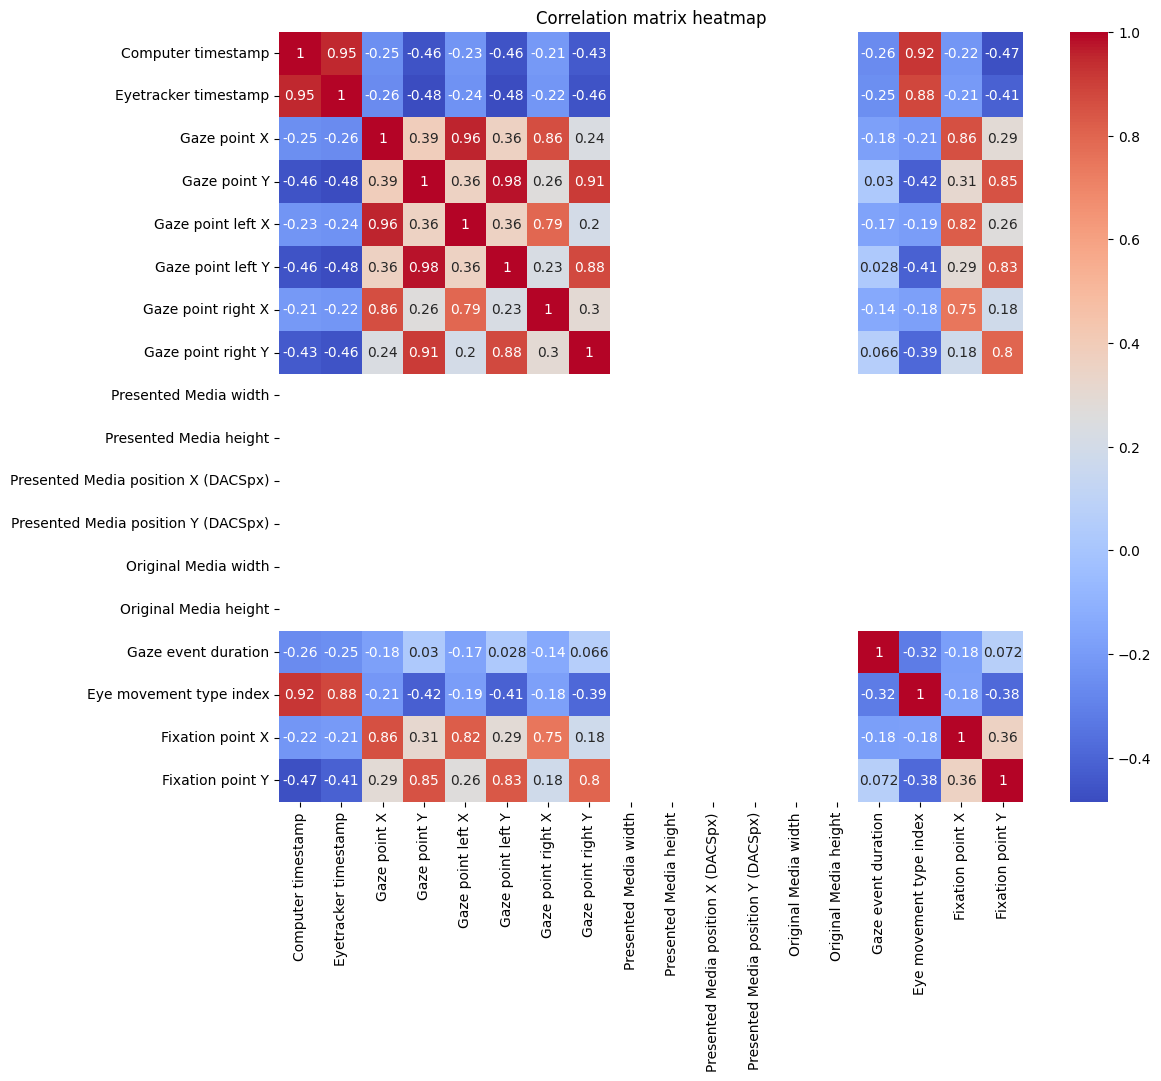

In [33]:
# Generate a heatmap illustrating the correlation matrix for columns with float data type
corr = X.corr()
pyplot.figure(figsize=(12,10))
sn.heatmap(corr, annot=True, cmap='coolwarm')
pyplot.title('Correlation matrix heatmap')

pyplot.show()

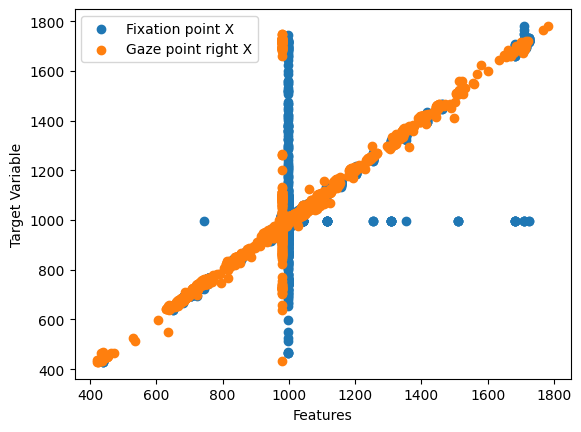

In [35]:
# Create a scatter plot
pyplot.scatter(df['Fixation point X'], df['Gaze point X'], label='Fixation point X')
pyplot.scatter(df['Gaze point right X'], df['Gaze point X'], label='Gaze point right X')
pyplot.xlabel('Features')
pyplot.ylabel('Target Variable')
pyplot.legend()
pyplot.show()

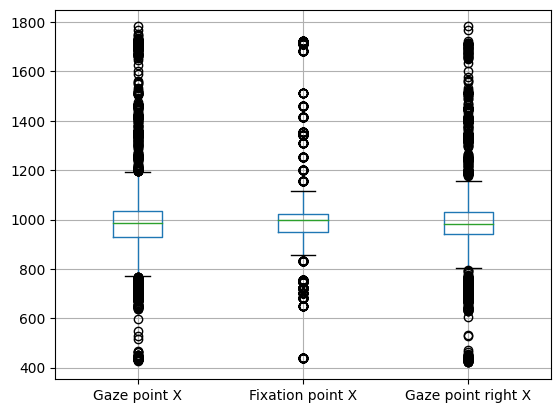

In [36]:
# Generate a box plot.
df.boxplot(column=['Gaze point X','Fixation point X', 'Gaze point right X'])
pyplot.show()

In [37]:
# We can further enhance data cleanliness by eliminating columns with significant correlation.

# Identify strongly correlated features.
highly_correlated = []
threshold = 0.7
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            colname = corr.columns[i]
            highly_correlated.append(colname)

print('Highly correlated columns are:')
highly_correlated

Highly correlated columns are:


['Eyetracker timestamp',
 'Gaze point left X',
 'Gaze point left Y',
 'Gaze point right X',
 'Gaze point right X',
 'Gaze point right Y',
 'Gaze point right Y',
 'Eye movement type index',
 'Eye movement type index',
 'Fixation point X',
 'Fixation point X',
 'Fixation point X',
 'Fixation point Y',
 'Fixation point Y',
 'Fixation point Y']

In [38]:
# Exclude features with high correlation
df = df.drop(columns=highly_correlated)

# Current state of the dataframe
df

,Computer timestamp,Sensor,Gaze point X,Gaze point Y,Gaze direction left X,Gaze direction left Y,Gaze direction left Z,Gaze direction right X,Gaze direction right Y,Gaze direction right Z,...,Presented Media width,Presented Media height,Presented Media position X (DACSpx),Presented Media position Y (DACSpx),Original Media width,Original Media height,Eye movement type,Gaze event duration,Fixation point X (MCSnorm),Fixation point Y (MCSnorm)
Recording timestamp,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000000000,2571560480,Eye Tracker,996.669004,494.130084,"0,05185","-0,04626","-0,99729","-0,07614","-0,03922","-0,99707",...,1662.0,1080.0,129.0,0.0,640.0,416.0,Fixation,406.419994,"0,5266","0,2475"
1970-01-01 00:00:00.000101893,2571662373,Eye Tracker,996.669004,494.130084,"0,05185","-0,04626","-0,99729","-0,07614","-0,03922","-0,99707",...,1662.0,1080.0,129.0,0.0,640.0,416.0,EyesNotFound,8.000000,"0,5266","0,2475"
1970-01-01 00:00:00.000110254,2571670734,Eye Tracker,1037.000000,1225.000000,"0,05680","0,37712","-0,92442","-0,03649","0,38592","-0,92181",...,1662.0,1080.0,129.0,0.0,640.0,416.0,Fixation,75.000000,"0,5266","0,2475"
1970-01-01 00:00:00.000118587,2571679067,Eye Tracker,1022.000000,1229.000000,"0,05709","0,38066","-0,92295","-0,05006","0,38583","-0,92121",...,1662.0,1080.0,129.0,0.0,640.0,416.0,Fixation,75.000000,"0,5266","0,2475"
1970-01-01 00:00:00.000126931,2571687411,Eye Tracker,1039.000000,1231.000000,"0,05881","0,38179","-0,92238","-0,03579","0,38614","-0,92175",...,1662.0,1080.0,129.0,0.0,640.0,416.0,Fixation,75.000000,"0,5266","0,2475"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.024326703,2595887183,Eye Tracker,642.000000,446.000000,"-0,08326","0,03957","-0,99574","-0,20233","0,05225","-0,97792",...,1662.0,1080.0,129.0,0.0,640.0,416.0,Fixation,367.000000,"0,3126","0,4105"
1970-01-01 00:00:00.024335036,2595895516,Eye Tracker,641.000000,445.000000,"-0,08375","0,03917","-0,99572","-0,20239","0,05202","-0,97792",...,1662.0,1080.0,129.0,0.0,640.0,416.0,Fixation,367.000000,"0,3126","0,4105"
1970-01-01 00:00:00.024343366,2595903846,Eye Tracker,648.000000,438.000000,"-0,08153","0,04220","-0,99578","-0,19822","0,04223","-0,97925",...,1662.0,1080.0,129.0,0.0,640.0,416.0,Fixation,367.000000,"0,3126","0,4105"


"""**Feature Engineering**"""


In [39]:
# Now execute one-hot encoding on this sanitized data and subsequently apply PCA once more
# I will utilize LSTM to determine which yields favorable outcomes

# Import the required/essential modules/libraries/packages
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack


In [40]:
# Segment categorical and numeric attributes
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Normalize numeric data
num_scaler = MinMaxScaler()
num_data = num_scaler.fit_transform(df[numerical_cols])

In [41]:

# Since we possess categorical data, we must conduct one-hot encoding on it
# In this context, I am utilizing the OneHotEncoder() function from the sklearn preprocessing module
# Perform one-hot encoding on categorical data
cat_encoder = OneHotEncoder(sparse=True)
cat_data = cat_encoder.fit_transform(df[categorical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [42]:
# Merge numerical and categorical data
combined_data = np.hstack((num_data, cat_data.toarray()))

combined_data

array([[0.        , 0.4195632 , 0.255805  , ..., 0.        , 0.        ,
        0.        ],
       [0.00418279, 0.4195632 , 0.255805  , ..., 0.        , 0.        ,
        0.        ],
       [0.00452601, 0.44937177, 0.94791667, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.99931457, 0.16186253, 0.20265152, ..., 0.        , 0.        ,
        0.        ],
       [0.99965796, 0.16555802, 0.20643939, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.16851441, 0.20170455, ..., 0.        , 0.        ,
        0.        ]])

In [43]:
# PCA
pca = PCA(n_components=10)
pca_data = pca.fit_transform(combined_data)

# print pca_data
pca_data

array([[ 3.38600315,  0.13079222,  1.22574771, ...,  0.41115662,
         0.07569772,  0.14466485],
       [ 3.82798393,  0.65531106,  1.40994762, ..., -0.07780007,
         0.05962307, -0.00987821],
       [ 0.75339978, -1.33399748, -1.03415236, ...,  0.76011081,
         0.16358104,  0.18882007],
       ...,
       [-1.2476254 ,  0.19739273,  0.20888843, ...,  0.02755409,
         0.05688583, -0.01408634],
       [-1.24973828,  0.20010055,  0.21094171, ...,  0.02179748,
         0.07401555, -0.00594751],
       [-1.24868417,  0.1996197 ,  0.21023527, ...,  0.02434821,
         0.04005302, -0.01077605]])

In [44]:
"""**LSTM**"""

# Divide into training and testing sets
train_size = int(len(pca_data) * 0.8)
train_data, test_data = pca_data[0:train_size,:], pca_data[train_size:len(df),:]


In [45]:
# Transform data into time series format

# This function generates a time series dataset where the X values constitute a sequence of temporal steps, and the y value
# represents the subsequent time step following the sequence.
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        # Extract a sequence of time_steps from X, commencing at index i
        # and add it to the input sequences Xs.
        Xs.append(X[i:(i+time_steps), :])
        # Retrieve the subsequent value from the target dataset y and include it in the target values ys.
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10 # flexible
# Define the training and testing datasets
X_train, y_train = create_dataset(train_data, train_data, time_steps)
X_test, y_test = create_dataset(test_data, test_data, time_steps)

In [47]:
# Construct an LSTM model
model = Sequential()

In [48]:
# Incorporate an LSTM layer comprising 64 units/neurons, and configure the input shape to align with the training data's shape
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))


In [49]:
# Integrate a Dense layer featuring 64 units/neurons and utilizing the ReLU activation function
model.add(Dense(64, activation='relu'))

In [50]:
# Include a Dense layer with the same number of units as the count of features in the training data
model.add(Dense(X_train.shape[2]))

In [51]:
# Configure the model by compiling it with the Adam optimizer and employing the mean squared error loss function
model.compile(optimizer='adam', loss='mse')

In [52]:
# Train the model
history=model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1)



Epoch 1/10
154/154 [==============================] - 5s 9ms/step - loss: 0.2713
Epoch 2/10
154/154 [==============================] - 1s 7ms/step - loss: 0.2116
Epoch 3/10
154/154 [==============================] - 1s 7ms/step - loss: 0.1949
Epoch 4/10
154/154 [==============================] - 1s 6ms/step - loss: 0.1803
Epoch 5/10
154/154 [==============================] - 1s 7ms/step - loss: 0.1653
Epoch 6/10
154/154 [==============================] - 1s 7ms/step - loss: 0.1565
Epoch 7/10
154/154 [==============================] - 1s 6ms/step - loss: 0.1517
Epoch 8/10
154/154 [==============================] - 2s 10ms/step - loss: 0.1452
Epoch 9/10
154/154 [==============================] - 1s 10ms/step - loss: 0.1415
Epoch 10/10
154/154 [==============================] - 1s 8ms/step - loss: 0.1363


In [53]:
# Generate predictions on the test set
y_pred = model.predict(X_test)

19/19 [==============================] - 1s 4ms/step


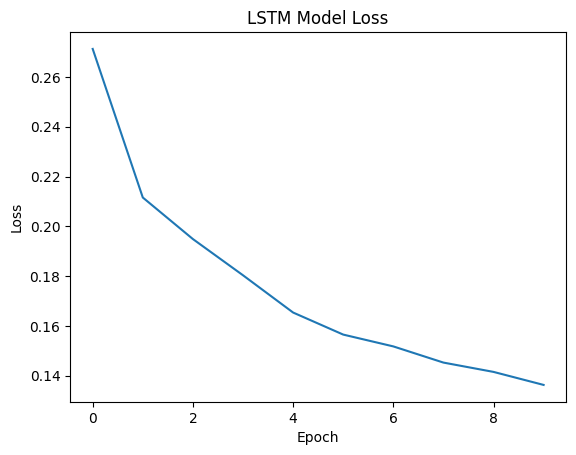

In [54]:
import matplotlib.pyplot as pyplot
# Create a plot illustrating the variation of training and validation loss across epochs
# Generate a graph depicting the relationship between epochs and loss.
pyplot.plot(history.history['loss'])
pyplot.title('LSTM Model Loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.show()

In [55]:
# # Transform y_test and y_pred into 2-dimensional arrays
# y_test = y_test.reshape(-1, pca_data.shape[1])
# y_pred = y_pred.reshape(-1, pca_data.shape[1])

# # Revert the transformed predictions and true values to their original form
# y_pred = scaler.inverse_transform(y_pred)
# y_test = scaler.inverse_transform(y_test)

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE).
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print scores
print('MSE:', mse)
print('MAE:', mae)


MSE: 0.13269737850966043
MAE: 0.18727337703157448
